<a href="https://colab.research.google.com/github/talamo13/Student-Success-Dashboard/blob/main/F20_HW_Assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> **Stat108 Pilot Data F20 - HW Assignments**



In [33]:
import pandas as pd
import numpy as np
import plotly.express as px
from IPython.display import Image

data_url = "https://raw.githubusercontent.com/talamo13/Student-Success-Dashboard/main/Stat108-F20-S21"
df = pd.read_csv(data_url)



> **Dataset:**


For the context of this assignment, we will only be looking at the **Spring Semester** and **Homework Assignment Scores**

In [40]:
df = df[df['SEMESTER'] != 'S']
df = df.iloc[:,:26]
df

,Student ID,SEMESTER,HW 1 Points Grade <Numeric MaxPoints:8 Category:Homework>,HW 2 Points Grade <Numeric MaxPoints:8 Category:Homework>,HW 3 Points Grade <Numeric MaxPoints:8 Category:Homework>,HW 4 Points Grade <Numeric MaxPoints:8 Category:Homework>,HW 5 Points Grade <Numeric MaxPoints:8 Category:Homework>,HW 6 Points Grade <Numeric MaxPoints:8 Category:Homework>,HW 7 Points Grade <Numeric MaxPoints:8 Category:Homework>,HW 8 Points Grade <Numeric MaxPoints:8 Category:Homework>,...,HW 15 Points Grade <Numeric MaxPoints:8 Category:Homework>,HW 16 Points Grade <Numeric MaxPoints:8 Category:Homework>,HW 17 Points Grade <Numeric MaxPoints:8 Category:Homework>,HW 18 Points Grade <Numeric MaxPoints:8 Category:Homework>,HW 19 Points Grade <Numeric MaxPoints:8 Category:Homework>,HW 20 Points Grade <Numeric MaxPoints:8 Category:Homework>,HW 21 Points Grade <Numeric MaxPoints:6.4 Category:Homework>,HW 22 Points Grade <Numeric MaxPoints:8 Category:Homework>,HW 23 Points Grade <Numeric MaxPoints:8 Category:Homework>,HW
0,F20.1,F,0.00,7.80,7.7800,7.60,7.84,1.06,4.00,0.0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,48.24600
1,F20.2,F,7.79,8.00,6.6400,8.00,8.00,7.85,8.00,8.0,...,8.00,8.0,8.00,7.36,0.00,7.72,6.20,2.00,1.49,168.35500
2,F20.3,F,6.52,7.80,7.9000,7.53,0.00,7.25,7.71,8.0,...,0.00,8.0,0.00,8.00,0.00,7.74,4.54,0.00,0.00,109.89000
3,F20.4,F,7.34,8.00,8.0000,8.00,7.92,7.70,8.00,8.0,...,8.00,8.0,8.00,8.00,8.00,8.00,8.00,8.00,8.00,175.91200
4,F20.5,F,5.80,6.82,6.3325,7.41,5.80,7.40,6.58,8.0,...,6.88,8.0,7.60,8.00,7.04,7.46,4.80,8.00,2.93,158.83175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,F20.139,F,7.87,8.00,8.0000,7.33,7.43,7.09,7.43,8.0,...,8.00,8.0,7.63,7.68,7.76,8.00,6.40,8.00,8.00,172.60100
139,F20.140,F,8.00,8.00,8.0000,7.84,8.00,7.85,8.00,8.0,...,8.00,8.0,8.00,8.00,8.00,7.72,4.80,8.00,8.00,175.83500
140,F20.141,F,8.00,7.50,8.0000,8.00,4.27,7.70,8.00,8.0,...,8.00,8.0,8.00,8.00,8.00,8.00,8.00,8.00,8.00,176.00000
141,F20.142,F,7.68,8.00,7.9600,7.80,7.71,7.85,8.00,8.0,...,8.00,8.0,8.00,8.00,8.00,8.00,5.40,8.00,7.83,175.24100




> **Homework #1:**



<Axes: title={'center': 'Distribution Of Scores In Homework 1'}>

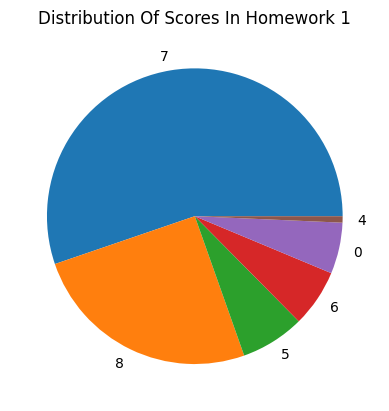

In [61]:
## Pie Chart For Score Distribution

## Put all homework scores into a python list
homework_series = df['HW 1 Points Grade <Numeric MaxPoints:8 Category:Homework>']
homework_list = homework_series.tolist()

## Create labels to categorize scrores
score_labels = {
    '8': (8.00,8.00),
    '7': (7.00,7.99),
    '6': (6.00,6.99),
    '5': (5.00,5.99),
    '4': (4.00,4.99),
    '3': (3.00,3.99),
    '2': (2.00,2.99),
    '1': (1.00,1.99),
    '0': (0.00,0.99)
}

def assign_label(points):
  for score,(lower_bound, upper_bound) in score_labels.items():
    if lower_bound <= points <= upper_bound:
      return score

grades = [assign_label(points) for points in homework_list]

grades_series = pd.Series(grades)

grade_occurences = grades_series.value_counts()

grade_occurences.plot(kind='pie', title='Distribution Of Scores In Homework 1')